In [1]:
import pandas as pd
import sklearn
import itertools
import numpy as np
import seaborn as sns
import re
import nltk
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import PassiveAggressiveClassifier
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import warnings
warnings.filterwarnings('ignore')

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [6]:
ds=pd.read_csv('combined_data_project news1.csv')
ds

,Unnamed: 0,title,text,subject,date,Label
0,0,Donald Trump Sends Out Embarrassing New Yearâ...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,3,Trump Is So Obsessed He Even Has Obamaâ€™s Na...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...,...
44914,44893,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
44915,44894,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
44916,44895,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
44917,44896,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [7]:
ds.shape

(44919, 6)

In [8]:
ds.columns

Index(['Unnamed: 0', 'title', 'text', 'subject', 'date', 'Label'], dtype='object')

# Preprocessing and Cleaning

In [9]:
ds.isnull().sum()

Unnamed: 0     0
title          0
text           0
subject       21
date          21
Label         21
dtype: int64

# Checking Datatypes

In [10]:
ds.dtypes

Unnamed: 0    object
title         object
text          object
subject       object
date          object
Label         object
dtype: object

# Observations:
    1.There are null values present in 3  columns.

# Removing Null Values

In [11]:
ds['subject'].fillna(ds['subject'].mode()[0],inplace=True)
ds['date'].fillna(ds['date'].mode()[0],inplace=True)
ds['Label'].fillna(ds['Label'].mode()[0],inplace=True)

In [12]:
ds.isnull().sum()

Unnamed: 0    0
title         0
text          0
subject       0
date          0
Label         0
dtype: int64

# Target Variable

In [13]:
ds['Label'].value_counts()

0                                                                                                                                                                                                                                                                                                                                                                                                                                 23482
1                                                                                                                                                                                                                                                                                                                                                                                                                                 21417
 lowered educational standards to accommodate Hispanics                                                                                                 

# EDA PROCESS

In [14]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44919 entries, 0 to 44918
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  44919 non-null  object
 1   title       44919 non-null  object
 2   text        44919 non-null  object
 3   subject     44919 non-null  object
 4   date        44919 non-null  object
 5   Label       44919 non-null  object
dtypes: object(6)
memory usage: 2.1+ MB


politicsNews                                                                                                                                                                                                                                                                                                                                                                                            11293
worldnews                                                                                                                                                                                                                                                                                                                                                                                               10145
News                                                                                                                                                                                                        

<Figure size 576x360 with 0 Axes>

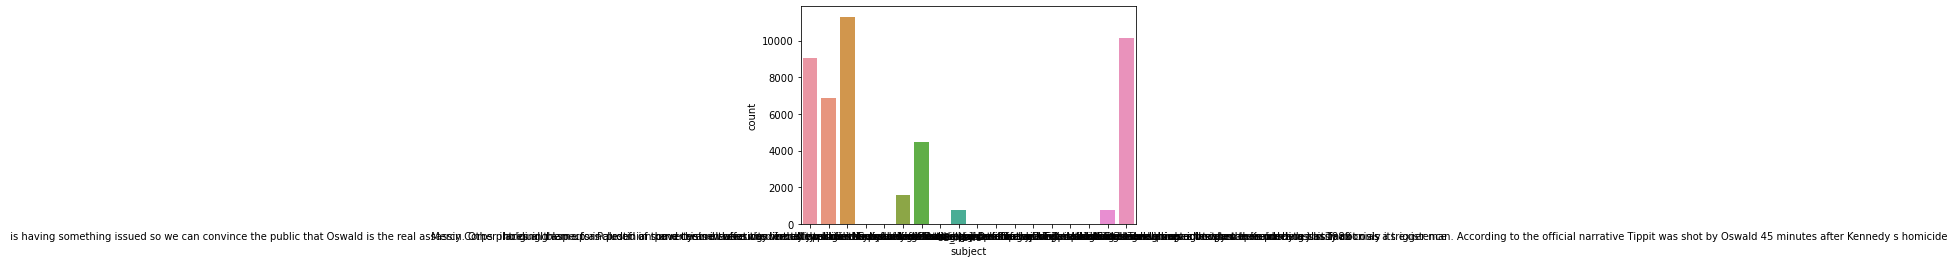

<Figure size 576x360 with 0 Axes>

In [15]:
sns.countplot(ds['subject'])
print(ds['subject'].value_counts())
plt.figure(figsize=(8,5))

# Dropping unneccessary columns

In [16]:
ds=ds.drop("Unnamed: 0", axis = 1)
ds=ds.drop("title", axis = 1)
ds=ds.drop("date", axis = 1)
ds=ds.drop("subject", axis = 1)

In [17]:
ds.head(10)

,text,Label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
5,The number of cases of cops brutalizing and ki...,0
6,Donald Trump spent a good portion of his day a...,0
7,In the wake of yet another court decision that...,0
8,Many people have raised the alarm regarding th...,0
9,Just when you might have thought we d get a br...,0


In [18]:
ds.tail(10)

,text,Label
44909,"SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",1
44910,GENEVA (Reuters) - North Korea and the United ...,1
44911,GENEVA (Reuters) - North Korea and the United ...,1
44912,COPENHAGEN (Reuters) - Danish police said on T...,1
44913,UNITED NATIONS (Reuters) - Two North Korean sh...,1
44914,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44915,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44916,MINSK (Reuters) - In the shadow of disused Sov...,1
44917,MOSCOW (Reuters) - Vatican Secretary of State ...,1
44918,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,1


In [19]:
from sklearn.preprocessing import LabelEncoder
columns=['text']
le=LabelEncoder()
for cols in columns:
    ds[cols]=le.fit_transform(ds[cols])

# Training and Testing Data

In [20]:
x=ds.drop(columns=['Label'],axis=1)
x

,text
0,10528
1,13578
2,21628
3,21583
4,22951
...,...
44914,7279
44915,17238
44916,18661
44917,19360


In [21]:
y=ds['Label']
y

0        0
1        0
2        0
3        0
4        0
        ..
44914    1
44915    1
44916    1
44917    1
44918    1
Name: Label, Length: 44919, dtype: object

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=45)

In [23]:
stop_words = stopwords.words('english')
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 2 and token not in stop_words:
            result.append(token)
            
    return result

In [24]:
lemmatizer = WordNetLemmatizer()
stpwrds = list(stopwords.words('english'))

In [25]:
stpwrds

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [27]:
vector=TfidfVectorizer()
xv_train=vector.fit_transform(x_train)
xv_test=vector.transform(x_test)


In [28]:
x_train.shape

(33689, 1)

In [29]:
x_test.shape

(11230, 1)

In [30]:
y_train.shape

(33689,)

In [31]:
y_test.shape

(11230,)

In [32]:
lg=LogisticRegression()

In [33]:
lg.fit(x_train,y_train)

LogisticRegression()

In [34]:
pred=lg.predict(x_test)
pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [35]:
accuracy_score(y_test,pred)

0.48993766696349067

In [36]:
confusion_matrix(y_test,pred)

array([[   0,    0,    0,    0,    2],
       [   0,    0,    0,    0,    1],
       [   0,    0,    0,    0,    1],
       [   0,    0,    0,  141, 5724],
       [   0,    0,    0,    0, 5361]], dtype=int64)

In [37]:
print(classification_report(y_test,pred))

                                                                                                                                                                                                        precision    recall  f1-score   support

                                                          Stone enlisted some 200 hardened criminals for the realistic riot scene.Cult Crimes & The Daily ShooterWhen concerning America s cult crimes       0.00      0.00      0.00         2
 according to KoloTV in Las Vegas: Nevada s Homeland Security Commission on Thursday approved a grant allocation plan that will increase funding for the region s fusion center to nearly $1.1 million       0.00      0.00      0.00         1
              that the status quo reflects the nation s unique good fortune in being favored by God and that those calling for change are merely subversive troublemakers. As the French ancien r gime       0.00      0.00      0.00         1
                                       

# RandomForestClassifier

In [38]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))

Accuracy on training data: 0.9999703167205913
Accuracy on testing data: 0.9899376669634906


In [39]:
predrfc=rfc.predict(x_test)
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

[[   0    0    0    2    0]
 [   0    1    0    0    0]
 [   0    0    1    0    0]
 [   0    0    0 5829   36]
 [   0    0    0   75 5286]]
                                                                                                                                                                                                        precision    recall  f1-score   support

                                                          Stone enlisted some 200 hardened criminals for the realistic riot scene.Cult Crimes & The Daily ShooterWhen concerning America s cult crimes       0.00      0.00      0.00         2
 according to KoloTV in Las Vegas: Nevada s Homeland Security Commission on Thursday approved a grant allocation plan that will increase funding for the region s fusion center to nearly $1.1 million       1.00      1.00      1.00         1
              that the status quo reflects the nation s unique good fortune in being favored by God and that those calling for change are 

# DecisionTreeClassifier

In [40]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model=dtc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(dtc.score(x_train,y_train)))
print('Accuracy on testing data:',format(dtc.score(x_test,y_test)))

Accuracy on training data: 0.9999703167205913
Accuracy on testing data: 0.9899376669634906


In [41]:
preddtc=rfc.predict(x_test)
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

[[   0    0    0    2    0]
 [   0    1    0    0    0]
 [   0    0    1    0    0]
 [   0    0    0 5829   36]
 [   0    0    0   75 5286]]
                                                                                                                                                                                                        precision    recall  f1-score   support

                                                          Stone enlisted some 200 hardened criminals for the realistic riot scene.Cult Crimes & The Daily ShooterWhen concerning America s cult crimes       0.00      0.00      0.00         2
 according to KoloTV in Las Vegas: Nevada s Homeland Security Commission on Thursday approved a grant allocation plan that will increase funding for the region s fusion center to nearly $1.1 million       1.00      1.00      1.00         1
              that the status quo reflects the nation s unique good fortune in being favored by God and that those calling for change are 

# MultinomialNB

In [42]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [43]:
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f'%score)
cm=metrics.confusion_matrix(y_test,pred)
confusion_matrix(y_test,pred)

accuracy: 0.522


array([[   0,    0,    0,    2,    0],
       [   0,    0,    0,    1,    0],
       [   0,    0,    0,    1,    0],
       [   0,    0,    0, 5865,    0],
       [   0,    0,    0, 5361,    0]], dtype=int64)

# PassiveAggressiveClassifier

In [44]:
pac=PassiveAggressiveClassifier(max_iter=50)


In [45]:
pac.fit(x_train,y_train)
pred=pac.predict(x_test)
score=metrics.accuracy_score(y_test,pred)
print('accuracy: %0.3f'%score)
cm=metrics.confusion_matrix(y_test,pred)
confusion_matrix(y_test,pred)

accuracy: 0.522


array([[   0,    0,    0,    2,    0],
       [   0,    0,    0,    1,    0],
       [   0,    0,    0,    1,    0],
       [   0,    0,    0, 5865,    0],
       [   0,    0,    0, 5361,    0]], dtype=int64)

# Gradient Boosting Classifier

In [46]:
from sklearn.ensemble import GradientBoostingClassifier

In [47]:
GBC=GradientBoostingClassifier(random_state=0)
GBC.fit(x_train,y_train)

GradientBoostingClassifier(random_state=0)

In [48]:
GBC.score(x_test,y_test)

0.967586821015138

In [49]:
pred_GBC=GBC.predict(x_test)
print(classification_report(y_test, pred_GBC))

                                                                                                                                                                                                        precision    recall  f1-score   support

                                                          Stone enlisted some 200 hardened criminals for the realistic riot scene.Cult Crimes & The Daily ShooterWhen concerning America s cult crimes       0.00      0.00      0.00         2
 according to KoloTV in Las Vegas: Nevada s Homeland Security Commission on Thursday approved a grant allocation plan that will increase funding for the region s fusion center to nearly $1.1 million       1.00      1.00      1.00         1
              that the status quo reflects the nation s unique good fortune in being favored by God and that those calling for change are merely subversive troublemakers. As the French ancien r gime       1.00      1.00      1.00         1
                                       

# Hyperparameter Tuning

In [50]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
model=rfc.fit(x_train,y_train)
prediction=model.predict(x_test)
print('Accuracy on training data:',format(rfc.score(x_train,y_train)))
print('Accuracy on testing data:',format(rfc.score(x_test,y_test)))
model=RandomForestClassifier(n_estimators=100,min_samples_split=25,max_depth=7,max_features=1)

Accuracy on training data: 0.9999703167205913
Accuracy on testing data: 0.9899376669634906


# AUC ROC Curve

In [51]:
# train models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
# logistic regression
model1 =RandomForestClassifier()
# knn
model2 =GradientBoostingClassifier(random_state=0)

# fit model
model1.fit(x_train, y_train)
model2.fit(x_train, y_train)

# predict probabilities
pred_prob1 = model1.predict_proba(x_test)
pred_prob2 = model2.predict_proba(x_test)

In [52]:
from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)
fpr2, tpr2, thresh2 = roc_curve(y_test, pred_prob2[:,1], pos_label=1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

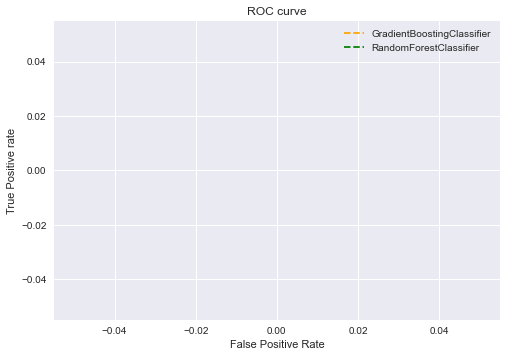

In [55]:
# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='GradientBoostingClassifier')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='RandomForestClassifier')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();


# Saving The Model

In [56]:
import pickle
filename='finalized_model.pkl'
pickle.dump(pac,open(filename,'wb'))